In [38]:
# Importações
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

In [42]:

# DATASET - https://www.kaggle.com/datasets/somesh24/spambase?select=spambase_csv.csv  

file_path = 'https://raw.githubusercontent.com/icaroperetti/spam-kaggle-csv/main/spambase_csv.csv'

# load the dataset
dataset = np.loadtxt(file_path,delimiter=",")


X = dataset[:,0:57] # Dados
y = dataset[:,57] # Classe 0 - Não é spam  1 - É spam

# Normalização dos dados
X = Normalizer().fit_transform(X)

print(X.shape,y.shape)

# print(X,'\n\n',y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80, shuffle=True)

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

# Modelo Sequencial
model = Sequential()

#input_dim: Dimensão de entrada, quantos atributos existem na base de dados exceto valor classe
model.add(Dense(100, input_dim=X.shape[1], activation='relu'))  # relu - Está entre as melhores funções de ativação
model.add(Dense(33, activation='relu'))
model.add(Dropout(0.3)) #  evitar que o modelo aprenda de mais sobre o dataset (overfitting)
model.add(Dense(11, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid')) # Independente da ativação que o neurônio de a saida será 0 ou 1

# compile the keras model
# binary_crossentropy: Função de erro, visto que o problema é binário 
# adam: Passa todos as amostras pela rede, calcula o erro por meio da função de 
# ... loss e faz a otimização voltando e ajustando os pesos
# accuracy: Avaliar se a rede está melhorando ou não - Vetor da classe
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#X_train: De onde os dados virão para realizar o treinamento
#y_train: Dados utilizados para verificar se a rede está aprendendo ou não
#batch_size: Número de amostras que irão passar pela rede neural a cada treinamento 
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=100) # fit the keras model on the dataset

print(history.history.keys())

# Verificar o quanto o modelo aprendeu
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))



(4601, 57) (4601,)
(3680, 57) (3680,) (921, 57) (921,)
Epoch 1/200
37/37 [==============================] - 1s 13ms/step - loss: 0.6804 - accuracy: 0.5834 - val_loss: 0.6663 - val_accuracy: 0.6080
Epoch 2/200
37/37 [==============================] - 0s 7ms/step - loss: 0.6610 - accuracy: 0.6054 - val_loss: 0.6446 - val_accuracy: 0.6080
Epoch 3/200
37/37 [==============================] - 0s 7ms/step - loss: 0.6248 - accuracy: 0.6231 - val_loss: 0.5925 - val_accuracy: 0.6612
Epoch 4/200
37/37 [==============================] - 0s 6ms/step - loss: 0.5745 - accuracy: 0.6810 - val_loss: 0.5360 - val_accuracy: 0.7524
Epoch 5/200
37/37 [==============================] - 0s 6ms/step - loss: 0.5131 - accuracy: 0.7402 - val_loss: 0.4837 - val_accuracy: 0.8122
Epoch 6/200
37/37 [==============================] - 0s 8ms/step - loss: 0.4717 - accuracy: 0.7731 - val_loss: 0.4433 - val_accuracy: 0.8306
Epoch 7/200
37/37 [==============================] - 0s 5ms/step - loss: 0.4381 - accuracy: 0.8014

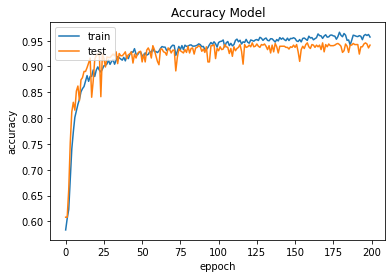

In [43]:
# Gráfico da acurácia
figure = plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Model')
plt.ylabel('accuracy')
plt.xlabel('eppoch')
plt.legend(['train', 'test'], loc='upper left')
figure.savefig('acc.pdf', dpi=figure.dpi)

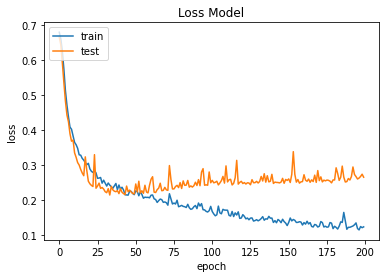

In [44]:
# Gráfico do LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss.pdf')
plt.show()


--- Confusion Matrix ---



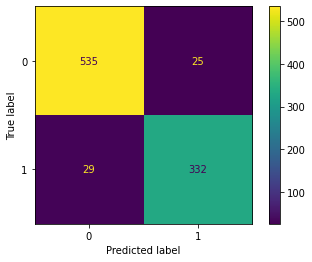

In [47]:
pred = (model.predict(X_test) > 0.5).astype("int32") # Vetor com a classificação de cada amostra do teste
# print("Pred",pred)

# Primeiro parametro: O que realmente é
# Segundo parametro: O que a rede retornou como verdade
confusionMatrix = confusion_matrix(y_test, pred)
# print(confusionMatrix)

confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)
confusion_matrix_display.plot()
print("\n--- Confusion Matrix ---\n")
plt.show()



In [48]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

tpr = tp / (tp + fn) # True Positive, todos os verdadeiros que realmente eram verdadeiros
tnr = tn / (tn + fp) # True Negative, todos falsos que realmente eram falsos

print('Verdadeiro Negativo: ', tn)
print('Falso Positivo:', fp)
print('Falso Negativo:', fn)
print('Verdadeiro Positivo:', tp,'\n')

# Calculo acurácia - os verdadeiros positivos e os verdadeiros negativos / soma de tudo
acc = (tp + tn) / (tp + tn + fp + fn) 


print("TPR:%.2f" % (tpr*100))
print("TNR:%.2f" % (tnr*100))
print("ACC:%.2f" % (acc*100))

Verdadeiro Negativo:  535
Falso Positivo: 25
Falso Negativo: 29
Verdadeiro Positivo: 332 

TPR:91.97
TNR:95.54
ACC:94.14


In [49]:
#AUC 
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred,pos_label=1)
auc = metrics.auc(fpr,tpr)
print("AUC:", auc)


AUC: 0.937512366442422


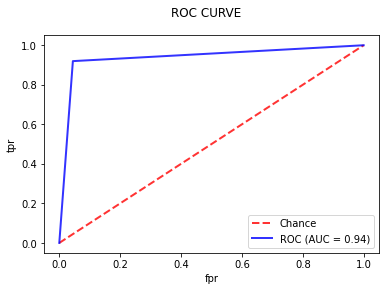

In [50]:
# Curva ROC
plt.plot([0,1], [0,1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.plot(fpr, tpr, color='b', label=r'ROC (AUC = %0.02F)' % (auc), lw=2, alpha=.8)
plt.suptitle('ROC CURVE')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend(loc='lower right')
plt.show()